In [346]:
from pulp import *
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [254]:
number_of_manufacturing_center = 1
number_of_distribution_center = 1
number_of_swapping_station = 15

In [255]:
for i in range(number_of_distribution_center):
    if i ==0:
        Xb0_c = LpVariable.dicts("Xb0_c",range(number_of_swapping_station),lowBound=0,cat='Integer')

In [256]:
for i in range(number_of_distribution_center):
    if i ==0:
        Xcb0 = LpVariable.dicts("Xb0_rev_c",range(number_of_swapping_station),lowBound=0,cat='Integer')

In [257]:
Yb = LpVariable.dicts("Yb",range(number_of_distribution_center),lowBound=0,upBound=1,cat='Integer')
Yb

{0: Yb_0}

In [258]:
Yc = LpVariable.dicts('Yc',range(number_of_swapping_station),lowBound=0,upBound=1,cat='Integer')
Yc

{0: Yc_0,
 1: Yc_1,
 2: Yc_2,
 3: Yc_3,
 4: Yc_4,
 5: Yc_5,
 6: Yc_6,
 7: Yc_7,
 8: Yc_8,
 9: Yc_9,
 10: Yc_10,
 11: Yc_11,
 12: Yc_12,
 13: Yc_13,
 14: Yc_14}

In [259]:
distance_BC = pd.read_excel(r'D:\Project\Case Study Values.xlsx',sheet_name='dist_B_to_C')
distance_BC

,flow,dist,Name
0,Xb1c1,8,Shastri Nagar
1,Xb1c2,9,Jhotwara
2,Xb1c3,13,Chandpol
3,Xb1c4,14,modikhana
4,Xb1c5,16,Ghat gate
5,Xb1c6,16,Laxmi Narayan Puri
6,Xb1c7,15,Subhash Chowk
7,Xb1c8,23,Amer
8,Xb1c9,15,Brahmapuri
9,Xb1c10,22,Malviya Nagar


In [260]:
constants = pd.read_excel(r'D:\Project\Case Study Values.xlsx',sheet_name='Constants')
constants

,const,value
0,Cab,12.00
1,Vab,100.00
2,Cbc,20.00
3,Vbc,20.00
4,alpha,0.02
5,Charging Cost,27.00
6,Zab,220.00
7,Zbc,120.00
8,Zo,2850.00


In [261]:
coef_for_B = pd.read_excel(r'D:\Project\Case Study Values.xlsx',sheet_name='Coef for B')
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour 1,Rent + Labour 3,Capacity
0,Yb1,1000000,400,4500000,13500000,18000


In [262]:
coef_for_C= pd.read_excel(r'D:\Project\Case Study Values.xlsx',sheet_name='Coef for C')
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


## objective 1:cost

### Transportation cost straight flow

In [263]:
Xbc = {0:Xb0_c}

In [264]:
k = constants.iloc[2,1]/constants.iloc[3,1]
list_of_transportation_cost_st=[]
for m in range(number_of_distribution_center):
    list_of_transportation_cost_st.append([distance_BC.iloc[i,1]*Xbc[m][i]*k for i in range(number_of_swapping_station)])

In [265]:
print(list_of_transportation_cost_st)

[[8.0*Xb0_c_0 + 0.0, 9.0*Xb0_c_1 + 0.0, 13.0*Xb0_c_2 + 0.0, 14.0*Xb0_c_3 + 0.0, 16.0*Xb0_c_4 + 0.0, 16.0*Xb0_c_5 + 0.0, 15.0*Xb0_c_6 + 0.0, 23.0*Xb0_c_7 + 0.0, 15.0*Xb0_c_8 + 0.0, 22.0*Xb0_c_9 + 0.0, 21.0*Xb0_c_10 + 0.0, 26.0*Xb0_c_11 + 0.0, 16.0*Xb0_c_12 + 0.0, 12.0*Xb0_c_13 + 0.0, 18.0*Xb0_c_14 + 0.0]]


### Transportation cost reverse flow

In [266]:
Xcb = {0:Xcb0
      }

In [267]:
k = constants.iloc[2,1]/constants.iloc[3,1]
list_of_transportation_cost_rev=[]
for m in range(number_of_distribution_center):
    list_of_transportation_cost_rev.append([distance_BC.iloc[i,1]*Xcb[m][i]*k for i in range(number_of_swapping_station)])

In [268]:
list_of_transportation_cost_rev

[[8.0*Xb0_rev_c_0 + 0.0,
  9.0*Xb0_rev_c_1 + 0.0,
  13.0*Xb0_rev_c_2 + 0.0,
  14.0*Xb0_rev_c_3 + 0.0,
  16.0*Xb0_rev_c_4 + 0.0,
  16.0*Xb0_rev_c_5 + 0.0,
  15.0*Xb0_rev_c_6 + 0.0,
  23.0*Xb0_rev_c_7 + 0.0,
  15.0*Xb0_rev_c_8 + 0.0,
  22.0*Xb0_rev_c_9 + 0.0,
  21.0*Xb0_rev_c_10 + 0.0,
  26.0*Xb0_rev_c_11 + 0.0,
  16.0*Xb0_rev_c_12 + 0.0,
  12.0*Xb0_rev_c_13 + 0.0,
  18.0*Xb0_rev_c_14 + 0.0]]

### Disposal cost

In [269]:
Xbd = LpVariable.dicts('Xdb',range(number_of_distribution_center),lowBound=0,cat='Integer')
Xbd

{0: Xdb_0}

In [270]:
#coef_for_B = pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Coef for B')
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour 1,Rent + Labour 3,Capacity
0,Yb1,1000000,400,4500000,13500000,18000


In [271]:
list_of_disposal_cost = [coef_for_B.iloc[i,2]*Xbd[i] for i in range(number_of_distribution_center)]
list_of_disposal_cost

[400*Xdb_0 + 0]

### Rent + labour

#### rent labor of distribution center

In [272]:
rent_labour_of_distribution_center_1 = [coef_for_B.iloc[i,3]*Yb[i] for i in range(number_of_distribution_center)]
rent_labour_of_distribution_center_1

[4500000*Yb_0 + 0]

In [273]:
rent_labour_of_distribution_center_3 = [coef_for_B.iloc[i,4]*Yb[i] for i in range(number_of_distribution_center)]
rent_labour_of_distribution_center_3

[13500000*Yb_0 + 0]

#### rent labour of swapping station

In [274]:
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


In [275]:
rent_labour_of_swapping_station_1 = [coef_for_C.iloc[i,3]*Yc[i] for i in range(number_of_swapping_station)]
rent_labour_of_swapping_station_1

[240000*Yc_0 + 0,
 96000*Yc_1 + 0,
 324000*Yc_2 + 0,
 144000*Yc_3 + 0,
 96000*Yc_4 + 0,
 288000*Yc_5 + 0,
 384000*Yc_6 + 0,
 180000*Yc_7 + 0,
 264000*Yc_8 + 0,
 324000*Yc_9 + 0,
 288000*Yc_10 + 0,
 120000*Yc_11 + 0,
 96000*Yc_12 + 0,
 384000*Yc_13 + 0,
 324000*Yc_14 + 0]

In [276]:
rent_labour_of_swapping_station_3 = [coef_for_C.iloc[i,4]*Yc[i] for i in range(number_of_swapping_station)]
rent_labour_of_swapping_station_3

[720000*Yc_0 + 0,
 288000*Yc_1 + 0,
 972000*Yc_2 + 0,
 432000*Yc_3 + 0,
 288000*Yc_4 + 0,
 864000*Yc_5 + 0,
 1152000*Yc_6 + 0,
 540000*Yc_7 + 0,
 792000*Yc_8 + 0,
 972000*Yc_9 + 0,
 864000*Yc_10 + 0,
 360000*Yc_11 + 0,
 288000*Yc_12 + 0,
 1152000*Yc_13 + 0,
 972000*Yc_14 + 0]

### charging cost

In [277]:
list_of_charging_cost_1 = [constants.iloc[5,1]*coef_for_C.iloc[i,5]*Yc[i] for i in range(number_of_swapping_station)]
list_of_charging_cost_1

[486000.0*Yc_0 + 0.0,
 270000.0*Yc_1 + 0.0,
 432000.0*Yc_2 + 0.0,
 486000.0*Yc_3 + 0.0,
 297000.0*Yc_4 + 0.0,
 459000.0*Yc_5 + 0.0,
 540000.0*Yc_6 + 0.0,
 243000.0*Yc_7 + 0.0,
 351000.0*Yc_8 + 0.0,
 297000.0*Yc_9 + 0.0,
 324000.0*Yc_10 + 0.0,
 432000.0*Yc_11 + 0.0,
 486000.0*Yc_12 + 0.0,
 351000.0*Yc_13 + 0.0,
 189000.0*Yc_14 + 0.0]

In [278]:
list_of_charging_cost_3 = [constants.iloc[5,1]*coef_for_C.iloc[i,6]*Yc[i] for i in range(number_of_swapping_station)]
list_of_charging_cost_3

[1608660.0*Yc_0 + 0.0,
 893700.0*Yc_1 + 0.0,
 1429920.0*Yc_2 + 0.0,
 1608660.0*Yc_3 + 0.0,
 983070.0*Yc_4 + 0.0,
 1519290.0*Yc_5 + 0.0,
 1787400.0*Yc_6 + 0.0,
 804330.0*Yc_7 + 0.0,
 1161810.0*Yc_8 + 0.0,
 983070.0*Yc_9 + 0.0,
 1072440.0*Yc_10 + 0.0,
 1429920.0*Yc_11 + 0.0,
 1608660.0*Yc_12 + 0.0,
 1161810.0*Yc_13 + 0.0,
 625590.0*Yc_14 + 0.0]

### Transportation cost A to B

In [279]:
num_of_Xab = number_of_manufacturing_center*number_of_distribution_center
Xab = LpVariable.dicts('Xab',range(num_of_Xab),lowBound=0,cat='Integer')
Xab

{0: Xab_0}

In [280]:
dist_A_to_B = pd.read_excel(r'D:\Project\Case Study Values.xlsx',sheet_name='dist_A_to_B')
dist_A_to_B

,flow,dist
0,Xa1b1,222


In [281]:
m = constants.iloc[0,1]/constants.iloc[1,1]
list_of_transportation_A_to_B = [dist_A_to_B.iloc[i,1]*Xab[i]*m for i in range(num_of_Xab)]
list_of_transportation_A_to_B

[26.64*Xab_0 + 0.0]

### Acquisition cost of distribution center

In [282]:
#Yb = LpVariable.dicts("Yb",range(number_of_distribution_center),lowBound=0,upBound=1,cat='Integer')
Yb

{0: Yb_0}

In [283]:
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour 1,Rent + Labour 3,Capacity
0,Yb1,1000000,400,4500000,13500000,18000


In [284]:
list_of_acq_cost_distribution = [coef_for_B.iloc[i,1]*Yb[i] for i in range(number_of_distribution_center)]
list_of_acq_cost_distribution

[1000000*Yb_0 + 0]

### Acquisition cost of swapping center

In [285]:
#coef_for_C= pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Coef for C')
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


In [286]:
list_of_acq_swap = [coef_for_C.iloc[i,2]*Yc[i] for i in range(number_of_swapping_station)]
list_of_acq_swap

[850000*Yc_0 + 0,
 475000*Yc_1 + 0,
 850000*Yc_2 + 0,
 850000*Yc_3 + 0,
 475000*Yc_4 + 0,
 850000*Yc_5 + 0,
 850000*Yc_6 + 0,
 475000*Yc_7 + 0,
 850000*Yc_8 + 0,
 475000*Yc_9 + 0,
 850000*Yc_10 + 0,
 475000*Yc_11 + 0,
 475000*Yc_12 + 0,
 850000*Yc_13 + 0,
 475000*Yc_14 + 0]

### objective function

In [287]:
prob = LpProblem('Cost',LpMinimize)
prob +=lpSum(list_of_transportation_cost_rev+list_of_transportation_cost_st+list_of_acq_cost_distribution+list_of_disposal_cost+list_of_transportation_A_to_B+list_of_charging_cost_3+rent_labour_of_distribution_center_3+rent_labour_of_swapping_station_3)

In [288]:
prob

Cost:
MINIMIZE
26.64*Xab_0 + 8.0*Xb0_c_0 + 9.0*Xb0_c_1 + 21.0*Xb0_c_10 + 26.0*Xb0_c_11 + 16.0*Xb0_c_12 + 12.0*Xb0_c_13 + 18.0*Xb0_c_14 + 13.0*Xb0_c_2 + 14.0*Xb0_c_3 + 16.0*Xb0_c_4 + 16.0*Xb0_c_5 + 15.0*Xb0_c_6 + 23.0*Xb0_c_7 + 15.0*Xb0_c_8 + 22.0*Xb0_c_9 + 8.0*Xb0_rev_c_0 + 9.0*Xb0_rev_c_1 + 21.0*Xb0_rev_c_10 + 26.0*Xb0_rev_c_11 + 16.0*Xb0_rev_c_12 + 12.0*Xb0_rev_c_13 + 18.0*Xb0_rev_c_14 + 13.0*Xb0_rev_c_2 + 14.0*Xb0_rev_c_3 + 16.0*Xb0_rev_c_4 + 16.0*Xb0_rev_c_5 + 15.0*Xb0_rev_c_6 + 23.0*Xb0_rev_c_7 + 15.0*Xb0_rev_c_8 + 22.0*Xb0_rev_c_9 + 400*Xdb_0 + 14500000*Yb_0 + 2328660.0*Yc_0 + 1181700.0*Yc_1 + 1936440.0*Yc_10 + 1789920.0*Yc_11 + 1896660.0*Yc_12 + 2313810.0*Yc_13 + 1597590.0*Yc_14 + 2401920.0*Yc_2 + 2040660.0*Yc_3 + 1271070.0*Yc_4 + 2383290.0*Yc_5 + 2939400.0*Yc_6 + 1344330.0*Yc_7 + 1953810.0*Yc_8 + 1955070.0*Yc_9 + 0.0
VARIABLES
0 <= Xab_0 Integer
0 <= Xb0_c_0 Integer
0 <= Xb0_c_1 Integer
0 <= Xb0_c_10 Integer
0 <= Xb0_c_11 Integer
0 <= Xb0_c_12 Integer
0 <= Xb0_c_13 Integer
0 <=

### Disposal constraint at swapping station

In [289]:
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


In [290]:
Xcb

{0: {0: Xb0_rev_c_0,
  1: Xb0_rev_c_1,
  2: Xb0_rev_c_2,
  3: Xb0_rev_c_3,
  4: Xb0_rev_c_4,
  5: Xb0_rev_c_5,
  6: Xb0_rev_c_6,
  7: Xb0_rev_c_7,
  8: Xb0_rev_c_8,
  9: Xb0_rev_c_9,
  10: Xb0_rev_c_10,
  11: Xb0_rev_c_11,
  12: Xb0_rev_c_12,
  13: Xb0_rev_c_13,
  14: Xb0_rev_c_14}}

#### disposal constraint for 1 year

In [291]:
#for i in range(number_of_swapping_station):
 #   prob += lpSum(Xcb[j][i] for j in range(number_of_distribution_center))>=coef_for_C.iloc[i,5]*Yc[i]*0.02

#### disposal constraint for 3 year

In [292]:
for i in range(number_of_swapping_station):
    prob += lpSum(Xcb[j][i] for j in range(number_of_distribution_center))>=coef_for_C.iloc[i,6]*Yc[i]*0.02

### binary constraint

In [293]:
for i in range(number_of_distribution_center):
    for j in range(number_of_swapping_station):
        prob += Yb[i]>=Xbc[i][j]*0.00002
        prob += Yb[i]>=Xcb[i][j]*0.00002

### Disposal constraint

In [294]:
constants

,const,value
0,Cab,12.00
1,Vab,100.00
2,Cbc,20.00
3,Vbc,20.00
4,alpha,0.02
5,Charging Cost,27.00
6,Zab,220.00
7,Zbc,120.00
8,Zo,2850.00


### disposal constraint

In [295]:
for i in range(number_of_distribution_center):
    prob += Xbd[i]== lpSum(Xcb[i][j] for j in range(number_of_swapping_station))

### Flow at swapping station

In [296]:
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


In [297]:
for i in range(number_of_swapping_station):
    prob += lpSum(Xbc[j][i] for j in range(number_of_distribution_center))-lpSum(Xcb[j][i] for j in range(number_of_distribution_center))<= coef_for_C.iloc[i,3]*Yc[i]
    prob += lpSum(Xbc[j][i] for j in range(number_of_distribution_center))-lpSum(Xcb[j][i] for j in range(number_of_distribution_center))>=0

### capacity constraint at distribution center

In [298]:
for i in range(number_of_distribution_center):
    prob += Xab[i]-Xbd[i]+ lpSum(Xcb[i][j] for j in range(number_of_distribution_center))-lpSum(Xbc[i][j] for j in range(number_of_distribution_center))<=coef_for_B.iloc[i,4]*Yb[i]
    prob +=  Xab[i]-Xbd[i]+ lpSum(Xcb[i][j] for j in range(number_of_distribution_center))-lpSum(Xbc[i][j] for j in range(number_of_distribution_center))>=0

### demand constraint

In [299]:
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


#### demand constraint for 1 year

In [300]:
#prob += lpSum(Yc[i]*coef_for_C.iloc[i,5] for i in range(number_of_swapping_station))>=140000

#### demand constraint for 3 year

In [301]:
prob += lpSum(Yc[i]*coef_for_C.iloc[i,6] for i in range(number_of_swapping_station))>=480000

### Yc constraint

In [302]:
prob += lpSum(Yc[i] for i in range(number_of_swapping_station))>=6

In [303]:
prob

Cost:
MINIMIZE
26.64*Xab_0 + 8.0*Xb0_c_0 + 9.0*Xb0_c_1 + 21.0*Xb0_c_10 + 26.0*Xb0_c_11 + 16.0*Xb0_c_12 + 12.0*Xb0_c_13 + 18.0*Xb0_c_14 + 13.0*Xb0_c_2 + 14.0*Xb0_c_3 + 16.0*Xb0_c_4 + 16.0*Xb0_c_5 + 15.0*Xb0_c_6 + 23.0*Xb0_c_7 + 15.0*Xb0_c_8 + 22.0*Xb0_c_9 + 8.0*Xb0_rev_c_0 + 9.0*Xb0_rev_c_1 + 21.0*Xb0_rev_c_10 + 26.0*Xb0_rev_c_11 + 16.0*Xb0_rev_c_12 + 12.0*Xb0_rev_c_13 + 18.0*Xb0_rev_c_14 + 13.0*Xb0_rev_c_2 + 14.0*Xb0_rev_c_3 + 16.0*Xb0_rev_c_4 + 16.0*Xb0_rev_c_5 + 15.0*Xb0_rev_c_6 + 23.0*Xb0_rev_c_7 + 15.0*Xb0_rev_c_8 + 22.0*Xb0_rev_c_9 + 400*Xdb_0 + 14500000*Yb_0 + 2328660.0*Yc_0 + 1181700.0*Yc_1 + 1936440.0*Yc_10 + 1789920.0*Yc_11 + 1896660.0*Yc_12 + 2313810.0*Yc_13 + 1597590.0*Yc_14 + 2401920.0*Yc_2 + 2040660.0*Yc_3 + 1271070.0*Yc_4 + 2383290.0*Yc_5 + 2939400.0*Yc_6 + 1344330.0*Yc_7 + 1953810.0*Yc_8 + 1955070.0*Yc_9 + 0.0
SUBJECT TO
_C1: Xb0_rev_c_0 - 1191.6 Yc_0 >= 0

_C2: Xb0_rev_c_1 - 662 Yc_1 >= 0

_C3: Xb0_rev_c_2 - 1059.2 Yc_2 >= 0

_C4: Xb0_rev_c_3 - 1191.6 Yc_3 >= 0

_C5: Xb

In [304]:
prob.solve()

1

In [305]:
LpStatus[prob.solve()]

'Optimal'

In [306]:
for variables in prob.variables():
    print( variables.name+'   '+ str(variables.value()))

Xab_0   9670.0
Xb0_c_0   1192.0
Xb0_c_1   662.0
Xb0_c_10   0.0
Xb0_c_11   1060.0
Xb0_c_12   1192.0
Xb0_c_13   0.0
Xb0_c_14   0.0
Xb0_c_2   1060.0
Xb0_c_3   1192.0
Xb0_c_4   729.0
Xb0_c_5   1126.0
Xb0_c_6   0.0
Xb0_c_7   596.0
Xb0_c_8   861.0
Xb0_c_9   0.0
Xb0_rev_c_0   1192.0
Xb0_rev_c_1   662.0
Xb0_rev_c_10   0.0
Xb0_rev_c_11   1060.0
Xb0_rev_c_12   1192.0
Xb0_rev_c_13   0.0
Xb0_rev_c_14   0.0
Xb0_rev_c_2   1060.0
Xb0_rev_c_3   1192.0
Xb0_rev_c_4   729.0
Xb0_rev_c_5   1126.0
Xb0_rev_c_6   0.0
Xb0_rev_c_7   596.0
Xb0_rev_c_8   861.0
Xb0_rev_c_9   0.0
Xdb_0   9670.0
Yb_0   1.0
Yc_0   1.0
Yc_1   1.0
Yc_10   0.0
Yc_11   1.0
Yc_12   1.0
Yc_13   0.0
Yc_14   0.0
Yc_2   1.0
Yc_3   1.0
Yc_4   1.0
Yc_5   1.0
Yc_6   0.0
Yc_7   1.0
Yc_8   1.0
Yc_9   0.0


## II objective

### Data

In [308]:
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour 1,Rent + Labour 3,Capacity
0,Yb1,1000000,400,4500000,13500000,18000


In [309]:
coef_for_C

,Name,Swapping station,Acquition cost,Rent + Labour 1,Rent + Labour 3,Demand1,Demand3,Capacity
0,Shastri Nagar,Yc1,850000,240000,720000,18000,59580,50
1,Jhotwara,Yc2,475000,96000,288000,10000,33100,30
2,Chandpol,Yc3,850000,324000,972000,16000,52960,50
3,modikhana,Yc4,850000,144000,432000,18000,59580,50
4,Ghat gate,Yc5,475000,96000,288000,11000,36410,30
5,Laxmi Narayan Puri,Yc6,850000,288000,864000,17000,56270,50
6,Subhash Chowk,Yc7,850000,384000,1152000,20000,66200,100
7,Amer,Yc8,475000,180000,540000,9000,29790,30
8,Brahmapuri,Yc9,850000,264000,792000,13000,43030,50
9,Malviya Nagar,Yc10,475000,324000,972000,11000,36410,30


In [310]:
constants

,const,value
0,Cab,12.00
1,Vab,100.00
2,Cbc,20.00
3,Vbc,20.00
4,alpha,0.02
5,Charging Cost,27.00
6,Zab,220.00
7,Zbc,120.00
8,Zo,2850.00


### Emission between A nad B

In [307]:
dist_A_to_B

,flow,dist
0,Xa1b1,222


In [313]:
emission_AB = lpSum(constants.iloc[6,1]*Xab[i]*dist_A_to_B.iloc[i,1]*(1/constants.iloc[1,1]) for i in range(number_of_distribution_center))
emission_AB

488.40000000000003*Xab_0 + 0.0

### emission between B and C

In [316]:
k = 1/constants.iloc[3,1]
list_of_emission_bc = []
j=0
for m in range(number_of_distribution_center):
    list_of_emission_bc.append([constants.iloc[7,1]*distance_BC.iloc[i+j,1]*Xbc[m][i]*k for i in range(number_of_swapping_station)])
    j=j+10

In [317]:
print(list_of_emission_bc)

[[48.0*Xb0_c_0 + 0.0, 54.0*Xb0_c_1 + 0.0, 78.0*Xb0_c_2 + 0.0, 84.0*Xb0_c_3 + 0.0, 96.0*Xb0_c_4 + 0.0, 96.0*Xb0_c_5 + 0.0, 90.0*Xb0_c_6 + 0.0, 138.0*Xb0_c_7 + 0.0, 90.0*Xb0_c_8 + 0.0, 132.0*Xb0_c_9 + 0.0, 126.0*Xb0_c_10 + 0.0, 156.0*Xb0_c_11 + 0.0, 96.0*Xb0_c_12 + 0.0, 72.0*Xb0_c_13 + 0.0, 108.0*Xb0_c_14 + 0.0]]


### emission between C and B

In [318]:
k = 1/constants.iloc[3,1]
list_of_emission_cb = []
j=0
for m in range(number_of_distribution_center):
    list_of_emission_cb.append([120*distance_BC.iloc[i+j,1]*Xcb[m][i]*k for i in range(number_of_swapping_station)])
    j=j+10

In [319]:
print(list_of_emission_cb)

[[48.0*Xb0_rev_c_0 + 0.0, 54.0*Xb0_rev_c_1 + 0.0, 78.0*Xb0_rev_c_2 + 0.0, 84.0*Xb0_rev_c_3 + 0.0, 96.0*Xb0_rev_c_4 + 0.0, 96.0*Xb0_rev_c_5 + 0.0, 90.0*Xb0_rev_c_6 + 0.0, 138.0*Xb0_rev_c_7 + 0.0, 90.0*Xb0_rev_c_8 + 0.0, 132.0*Xb0_rev_c_9 + 0.0, 126.0*Xb0_rev_c_10 + 0.0, 156.0*Xb0_rev_c_11 + 0.0, 96.0*Xb0_rev_c_12 + 0.0, 72.0*Xb0_rev_c_13 + 0.0, 108.0*Xb0_rev_c_14 + 0.0]]


### emission between B and C operations

In [320]:
emission_BC_op_1 = lpSum(constants.iloc[8,1]*coef_for_C.iloc[i,5]*Yc[i] for i in range(number_of_swapping_station))
emission_BC_op_1

51300000.0*Yc_0 + 28500000.0*Yc_1 + 34200000.0*Yc_10 + 45600000.0*Yc_11 + 51300000.0*Yc_12 + 37050000.0*Yc_13 + 19950000.0*Yc_14 + 45600000.0*Yc_2 + 51300000.0*Yc_3 + 31350000.0*Yc_4 + 48450000.0*Yc_5 + 57000000.0*Yc_6 + 25650000.0*Yc_7 + 37050000.0*Yc_8 + 31350000.0*Yc_9 + 0.0

In [321]:
emission_BC_op_3 = lpSum(constants.iloc[8,1]*coef_for_C.iloc[i,6]*Yc[i] for i in range(number_of_swapping_station))
emission_BC_op_3

169803000.0*Yc_0 + 94335000.0*Yc_1 + 113202000.0*Yc_10 + 150936000.0*Yc_11 + 169803000.0*Yc_12 + 122635500.0*Yc_13 + 66034500.0*Yc_14 + 150936000.0*Yc_2 + 169803000.0*Yc_3 + 103768500.0*Yc_4 + 160369500.0*Yc_5 + 188670000.0*Yc_6 + 84901500.0*Yc_7 + 122635500.0*Yc_8 + 103768500.0*Yc_9 + 0.0

### Emission objective

In [322]:
prob2 = LpProblem('emission',LpMinimize)
prob2 += lpSum(emission_AB+list_of_emission_bc+emission_BC_op_3+list_of_emission_cb)
prob2

emission:
MINIMIZE
488.40000000000003*Xab_0 + 48.0*Xb0_c_0 + 54.0*Xb0_c_1 + 126.0*Xb0_c_10 + 156.0*Xb0_c_11 + 96.0*Xb0_c_12 + 72.0*Xb0_c_13 + 108.0*Xb0_c_14 + 78.0*Xb0_c_2 + 84.0*Xb0_c_3 + 96.0*Xb0_c_4 + 96.0*Xb0_c_5 + 90.0*Xb0_c_6 + 138.0*Xb0_c_7 + 90.0*Xb0_c_8 + 132.0*Xb0_c_9 + 48.0*Xb0_rev_c_0 + 54.0*Xb0_rev_c_1 + 126.0*Xb0_rev_c_10 + 156.0*Xb0_rev_c_11 + 96.0*Xb0_rev_c_12 + 72.0*Xb0_rev_c_13 + 108.0*Xb0_rev_c_14 + 78.0*Xb0_rev_c_2 + 84.0*Xb0_rev_c_3 + 96.0*Xb0_rev_c_4 + 96.0*Xb0_rev_c_5 + 90.0*Xb0_rev_c_6 + 138.0*Xb0_rev_c_7 + 90.0*Xb0_rev_c_8 + 132.0*Xb0_rev_c_9 + 169803000.0*Yc_0 + 94335000.0*Yc_1 + 113202000.0*Yc_10 + 150936000.0*Yc_11 + 169803000.0*Yc_12 + 122635500.0*Yc_13 + 66034500.0*Yc_14 + 150936000.0*Yc_2 + 169803000.0*Yc_3 + 103768500.0*Yc_4 + 160369500.0*Yc_5 + 188670000.0*Yc_6 + 84901500.0*Yc_7 + 122635500.0*Yc_8 + 103768500.0*Yc_9 + 0.0
VARIABLES
0 <= Xab_0 Integer
0 <= Xb0_c_0 Integer
0 <= Xb0_c_1 Integer
0 <= Xb0_c_10 Integer
0 <= Xb0_c_11 Integer
0 <= Xb0_c_12 Inte

### IInd objective 

In [323]:
cons = {}
for i in range(len(prob.constraints.values())):
    cons[i] = list(prob.constraints.values())[i]

In [324]:
for i in range(len(cons)):
    prob2 += cons[i]

In [325]:
prob2

emission:
MINIMIZE
488.40000000000003*Xab_0 + 48.0*Xb0_c_0 + 54.0*Xb0_c_1 + 126.0*Xb0_c_10 + 156.0*Xb0_c_11 + 96.0*Xb0_c_12 + 72.0*Xb0_c_13 + 108.0*Xb0_c_14 + 78.0*Xb0_c_2 + 84.0*Xb0_c_3 + 96.0*Xb0_c_4 + 96.0*Xb0_c_5 + 90.0*Xb0_c_6 + 138.0*Xb0_c_7 + 90.0*Xb0_c_8 + 132.0*Xb0_c_9 + 48.0*Xb0_rev_c_0 + 54.0*Xb0_rev_c_1 + 126.0*Xb0_rev_c_10 + 156.0*Xb0_rev_c_11 + 96.0*Xb0_rev_c_12 + 72.0*Xb0_rev_c_13 + 108.0*Xb0_rev_c_14 + 78.0*Xb0_rev_c_2 + 84.0*Xb0_rev_c_3 + 96.0*Xb0_rev_c_4 + 96.0*Xb0_rev_c_5 + 90.0*Xb0_rev_c_6 + 138.0*Xb0_rev_c_7 + 90.0*Xb0_rev_c_8 + 132.0*Xb0_rev_c_9 + 169803000.0*Yc_0 + 94335000.0*Yc_1 + 113202000.0*Yc_10 + 150936000.0*Yc_11 + 169803000.0*Yc_12 + 122635500.0*Yc_13 + 66034500.0*Yc_14 + 150936000.0*Yc_2 + 169803000.0*Yc_3 + 103768500.0*Yc_4 + 160369500.0*Yc_5 + 188670000.0*Yc_6 + 84901500.0*Yc_7 + 122635500.0*Yc_8 + 103768500.0*Yc_9 + 0.0
SUBJECT TO
_C1: Xb0_rev_c_0 - 1191.6 Yc_0 >= 0

_C2: Xb0_rev_c_1 - 662 Yc_1 >= 0

_C3: Xb0_rev_c_2 - 1059.2 Yc_2 >= 0

_C4: Xb0_rev_c

In [326]:
prob2.solve()

1

In [327]:
LpStatus[prob2.solve()]

'Optimal'

In [328]:
for variables in prob2.variables():
    print( variables.name+'   '+ str(variables.value()))

Xab_0   9669.0
Xb0_c_0   1192.0
Xb0_c_1   662.0
Xb0_c_10   0.0
Xb0_c_11   0.0
Xb0_c_12   1192.0
Xb0_c_13   861.0
Xb0_c_14   0.0
Xb0_c_2   1060.0
Xb0_c_3   1192.0
Xb0_c_4   729.0
Xb0_c_5   0.0
Xb0_c_6   1324.0
Xb0_c_7   596.0
Xb0_c_8   861.0
Xb0_c_9   0.0
Xb0_rev_c_0   1192.0
Xb0_rev_c_1   662.0
Xb0_rev_c_10   0.0
Xb0_rev_c_11   0.0
Xb0_rev_c_12   1192.0
Xb0_rev_c_13   861.0
Xb0_rev_c_14   0.0
Xb0_rev_c_2   1060.0
Xb0_rev_c_3   1192.0
Xb0_rev_c_4   729.0
Xb0_rev_c_5   0.0
Xb0_rev_c_6   1324.0
Xb0_rev_c_7   596.0
Xb0_rev_c_8   861.0
Xb0_rev_c_9   0.0
Xdb_0   9669.0
Yb_0   1.0
Yc_0   1.0
Yc_1   1.0
Yc_10   0.0
Yc_11   0.0
Yc_12   1.0
Yc_13   1.0
Yc_14   0.0
Yc_2   1.0
Yc_3   1.0
Yc_4   1.0
Yc_5   0.0
Yc_6   1.0
Yc_7   1.0
Yc_8   1.0
Yc_9   0.0


In [329]:
prob2.objective.value()

1383615495.6

## E constraint

In [331]:
obj = {
    0:prob.objective,
    1:prob2.objective,
}

In [332]:
obj

{0: 26.64*Xab_0 + 8.0*Xb0_c_0 + 9.0*Xb0_c_1 + 21.0*Xb0_c_10 + 26.0*Xb0_c_11 + 16.0*Xb0_c_12 + 12.0*Xb0_c_13 + 18.0*Xb0_c_14 + 13.0*Xb0_c_2 + 14.0*Xb0_c_3 + 16.0*Xb0_c_4 + 16.0*Xb0_c_5 + 15.0*Xb0_c_6 + 23.0*Xb0_c_7 + 15.0*Xb0_c_8 + 22.0*Xb0_c_9 + 8.0*Xb0_rev_c_0 + 9.0*Xb0_rev_c_1 + 21.0*Xb0_rev_c_10 + 26.0*Xb0_rev_c_11 + 16.0*Xb0_rev_c_12 + 12.0*Xb0_rev_c_13 + 18.0*Xb0_rev_c_14 + 13.0*Xb0_rev_c_2 + 14.0*Xb0_rev_c_3 + 16.0*Xb0_rev_c_4 + 16.0*Xb0_rev_c_5 + 15.0*Xb0_rev_c_6 + 23.0*Xb0_rev_c_7 + 15.0*Xb0_rev_c_8 + 22.0*Xb0_rev_c_9 + 400*Xdb_0 + 14500000*Yb_0 + 2328660.0*Yc_0 + 1181700.0*Yc_1 + 1936440.0*Yc_10 + 1789920.0*Yc_11 + 1896660.0*Yc_12 + 2313810.0*Yc_13 + 1597590.0*Yc_14 + 2401920.0*Yc_2 + 2040660.0*Yc_3 + 1271070.0*Yc_4 + 2383290.0*Yc_5 + 2939400.0*Yc_6 + 1344330.0*Yc_7 + 1953810.0*Yc_8 + 1955070.0*Yc_9 + 0.0,
 1: 488.40000000000003*Xab_0 + 48.0*Xb0_c_0 + 54.0*Xb0_c_1 + 126.0*Xb0_c_10 + 156.0*Xb0_c_11 + 96.0*Xb0_c_12 + 72.0*Xb0_c_13 + 108.0*Xb0_c_14 + 78.0*Xb0_c_2 + 84.0*Xb0_c_3 +

In [334]:
cons

{0: 1*Xb0_rev_c_0 + -1191.6000000000001*Yc_0 + 0.0 >= 0,
 1: 1*Xb0_rev_c_1 + -662.0*Yc_1 + 0.0 >= 0,
 2: 1*Xb0_rev_c_2 + -1059.2*Yc_2 + 0.0 >= 0,
 3: 1*Xb0_rev_c_3 + -1191.6000000000001*Yc_3 + 0.0 >= 0,
 4: 1*Xb0_rev_c_4 + -728.2*Yc_4 + 0.0 >= 0,
 5: 1*Xb0_rev_c_5 + -1125.4*Yc_5 + 0.0 >= 0,
 6: 1*Xb0_rev_c_6 + -1324.0*Yc_6 + 0.0 >= 0,
 7: 1*Xb0_rev_c_7 + -595.8000000000001*Yc_7 + 0.0 >= 0,
 8: 1*Xb0_rev_c_8 + -860.6*Yc_8 + 0.0 >= 0,
 9: 1*Xb0_rev_c_9 + -728.2*Yc_9 + 0.0 >= 0,
 10: 1*Xb0_rev_c_10 + -794.4*Yc_10 + 0.0 >= 0,
 11: 1*Xb0_rev_c_11 + -1059.2*Yc_11 + 0.0 >= 0,
 12: 1*Xb0_rev_c_12 + -1191.6000000000001*Yc_12 + 0.0 >= 0,
 13: 1*Xb0_rev_c_13 + -860.6*Yc_13 + 0.0 >= 0,
 14: 1*Xb0_rev_c_14 + -463.40000000000003*Yc_14 + 0.0 >= 0,
 15: -2e-05*Xb0_c_0 + 1*Yb_0 + 0.0 >= 0,
 16: -2e-05*Xb0_rev_c_0 + 1*Yb_0 + 0.0 >= 0,
 17: -2e-05*Xb0_c_1 + 1*Yb_0 + 0.0 >= 0,
 18: -2e-05*Xb0_rev_c_1 + 1*Yb_0 + 0.0 >= 0,
 19: -2e-05*Xb0_c_2 + 1*Yb_0 + 0.0 >= 0,
 20: -2e-05*Xb0_rev_c_2 + 1*Yb_0 + 0.0 >= 0,

In [335]:
payoff=np.zeros([len(obj),len(obj)]);
for k in range(0,len(obj)):
    model = LpProblem("Min",LpMinimize)
    model += obj[k]
    for i in range(0,len(cons)):
        model += cons[i]
    result = model.solve()
    if LpStatus[result] == 'Optimal':
        
        payoff[k,k]= value(model.objective);
        kp=k+1;
        model = LpProblem("Min",LpMinimize)
        while kp<= len(obj)-1:
                model += obj[kp]
                if kp-1>=0:
                    model += obj[kp-1] <= payoff[k,kp-1]
                for i in range(0,len(cons)):
                    model += cons[i]
                result = model.solve()
                if LpStatus[result] == 'Optimal':
                    
                    payoff[k,kp]= value(model.objective)
                    kp += 1     
                else:
                    sys.exit('no optimal solution for mod_payoff')
        kp=0;
        model += obj[k] <= payoff[k,k]
        while kp< k:
            model += obj[kp]
            if kp-1>=0:
                model += obj[kp-1] <= payoff[k,kp-1]
            for i in range(0,len(cons)):
                model += cons[i]
            result = model.solve()
            if LpStatus[result] == 'Optimal':
                
                payoff[k,kp]= value(model.objective)
                kp += 1
            else:
                sys.exit('no optimal solution for mod_payoff')   
           
    else:
        sys.exit('no optimal solution for mod_payoff')

In [336]:
payoff

array([[3.75154228e+07, 1.38380059e+09],
       [3.85642282e+07, 1.38361550e+09]])

In [337]:
minobj=np.zeros([len(obj),1]);
maxobj=np.zeros([len(obj),1]);
for k in range(0,len(obj)):
        minobj[k] = min(payoff[:,k]);
        maxobj[k] = max(payoff[:,k]);

In [338]:
minobj

array([[3.75154228e+07],
       [1.38361550e+09]])

In [339]:
maxobj

array([[3.85642282e+07],
       [1.38380059e+09]])

### pareto optimal solution

In [340]:
# slack variables
s = {
     1: LpVariable("s2",lowBound = 0),
     }

In [348]:
intervals=10;    
lst = np.empty([intervals+1,len(obj)]);
key_intervals ={}
for g in range(0,intervals+1):
    print('grid point no: ', g+1, 'val: ', maxobj[1] - ((g)/intervals)*(maxobj[1]- minobj[1]))
    model = LpProblem("Min",LpMinimize)
    code = 1/(maxobj[1]-minobj[1]);
    model += obj[0]+1e-3*s[1]*code
    model += obj[1]+s[1] == maxobj[1] - ((g)/intervals)*(maxobj[1]- minobj[1])
    for i in range(0,len(cons)):
        model += cons[i]
    print(model)
    result = model.solve()
    if LpStatus[result] == 'Optimal':
        key_variable = {}
        for variables in model.variables():
            key_variable[variables]=variables.value()
        key_intervals[g]=key_variable
        for k in range(0,len(obj)):
            if k==0:
                var_coef = dict(zip(list(prob.objective.keys()),list(prob.objective.values())))
                lst[g,k]=sum(k.value()*v  for k,v in var_coef.items())
            if k==1:
                var_coeff = dict(zip(list(prob2.objective.keys()),list(prob2.objective.values())))
                lst[g,k]=sum(k.value()*v  for k,v in var_coeff.items())
    else:
        print('early exit (jump)')
        break

grid point no:  1 val:  [1.38380059e+09]
Min:
MINIMIZE
26.64*Xab_0 + 8.0*Xb0_c_0 + 9.0*Xb0_c_1 + 21.0*Xb0_c_10 + 26.0*Xb0_c_11 + 16.0*Xb0_c_12 + 12.0*Xb0_c_13 + 18.0*Xb0_c_14 + 13.0*Xb0_c_2 + 14.0*Xb0_c_3 + 16.0*Xb0_c_4 + 16.0*Xb0_c_5 + 15.0*Xb0_c_6 + 23.0*Xb0_c_7 + 15.0*Xb0_c_8 + 22.0*Xb0_c_9 + 8.0*Xb0_rev_c_0 + 9.0*Xb0_rev_c_1 + 21.0*Xb0_rev_c_10 + 26.0*Xb0_rev_c_11 + 16.0*Xb0_rev_c_12 + 12.0*Xb0_rev_c_13 + 18.0*Xb0_rev_c_14 + 13.0*Xb0_rev_c_2 + 14.0*Xb0_rev_c_3 + 16.0*Xb0_rev_c_4 + 16.0*Xb0_rev_c_5 + 15.0*Xb0_rev_c_6 + 23.0*Xb0_rev_c_7 + 15.0*Xb0_rev_c_8 + 22.0*Xb0_rev_c_9 + 400*Xdb_0 + 14500000*Yb_0 + 2328660.0*Yc_0 + 1181700.0*Yc_1 + 1936440.0*Yc_10 + 1789920.0*Yc_11 + 1896660.0*Yc_12 + 2313810.0*Yc_13 + 1597590.0*Yc_14 + 2401920.0*Yc_2 + 2040660.0*Yc_3 + 1271070.0*Yc_4 + 2383290.0*Yc_5 + 2939400.0*Yc_6 + 1344330.0*Yc_7 + 1953810.0*Yc_8 + 1955070.0*Yc_9 + [5.40259022e-09]*s2 + [0.]
SUBJECT TO
_C1: 488.4 Xab_0 + 48 Xb0_c_0 + 54 Xb0_c_1 + 126 Xb0_c_10 + 156 Xb0_c_11
 + 96 Xb0_c_12 +

In [349]:
key_intervals

{0: {Xab_0: 9670.0,
  Xb0_c_0: 1192.0,
  Xb0_c_1: 662.0,
  Xb0_c_10: 0.0,
  Xb0_c_11: 1060.0,
  Xb0_c_12: 1192.0,
  Xb0_c_13: 0.0,
  Xb0_c_14: 0.0,
  Xb0_c_2: 1060.0,
  Xb0_c_3: 1192.0,
  Xb0_c_4: 729.0,
  Xb0_c_5: 1126.0,
  Xb0_c_6: 0.0,
  Xb0_c_7: 596.0,
  Xb0_c_8: 861.0,
  Xb0_c_9: 0.0,
  Xb0_rev_c_0: 1192.0,
  Xb0_rev_c_1: 662.0,
  Xb0_rev_c_10: 0.0,
  Xb0_rev_c_11: 1060.0,
  Xb0_rev_c_12: 1192.0,
  Xb0_rev_c_13: 0.0,
  Xb0_rev_c_14: 0.0,
  Xb0_rev_c_2: 1060.0,
  Xb0_rev_c_3: 1192.0,
  Xb0_rev_c_4: 729.0,
  Xb0_rev_c_5: 1126.0,
  Xb0_rev_c_6: 0.0,
  Xb0_rev_c_7: 596.0,
  Xb0_rev_c_8: 861.0,
  Xb0_rev_c_9: 0.0,
  Xdb_0: 9670.0,
  Yb_0: 1.0,
  Yc_0: 1.0,
  Yc_1: 1.0,
  Yc_10: 0.0,
  Yc_11: 1.0,
  Yc_12: 1.0,
  Yc_13: 0.0,
  Yc_14: 0.0,
  Yc_2: 1.0,
  Yc_3: 1.0,
  Yc_4: 1.0,
  Yc_5: 1.0,
  Yc_6: 0.0,
  Yc_7: 1.0,
  Yc_8: 1.0,
  Yc_9: 0.0,
  s2: 0.0},
 1: {Xab_0: 9669.0,
  Xb0_c_0: 1192.0,
  Xb0_c_1: 662.0,
  Xb0_c_10: 0.0,
  Xb0_c_11: 1060.0,
  Xb0_c_12: 1192.0,
  Xb0_c_13: 0.0,
  Xb0

In [350]:
payoff

array([[3.75154228e+07, 1.38380059e+09],
       [3.85642282e+07, 1.38361550e+09]])

In [351]:
lst

array([[3.75154228e+07, 1.38380059e+09],
       [3.78279722e+07, 1.38373396e+09],
       [3.78279722e+07, 1.38373396e+09],
       [3.78279722e+07, 1.38373396e+09],
       [3.81828062e+07, 1.38370296e+09],
       [3.81828062e+07, 1.38370296e+09],
       [3.85642282e+07, 1.38361550e+09],
       [3.85642282e+07, 1.38361550e+09],
       [3.85642282e+07, 1.38361550e+09],
       [3.85642282e+07, 1.38361550e+09],
       [3.85642282e+07, 1.38361550e+09]])

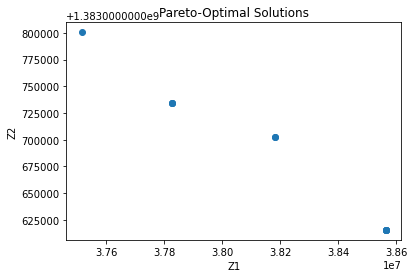

In [352]:
plt.scatter(lst[:,0], lst[:,1])
# set axis lables
plt.xlabel("Z1")
plt.ylabel("Z2")
# set chart title
plt.title("Pareto-Optimal Solutions")
plt.show()